***Data Set 1 : Exploration***

General Info

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../raw_data/ds_salaries.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [2]:
data.work_year.value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

In [3]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

***Salaries***

In [4]:
data ["salary_in_usd"].max() #Largest Salary 30Million
top_10_salaries = data['salary_in_usd'].nlargest(10)
top_10_salaries
data ["salary_in_usd"].median() # median is 135000

135000.0

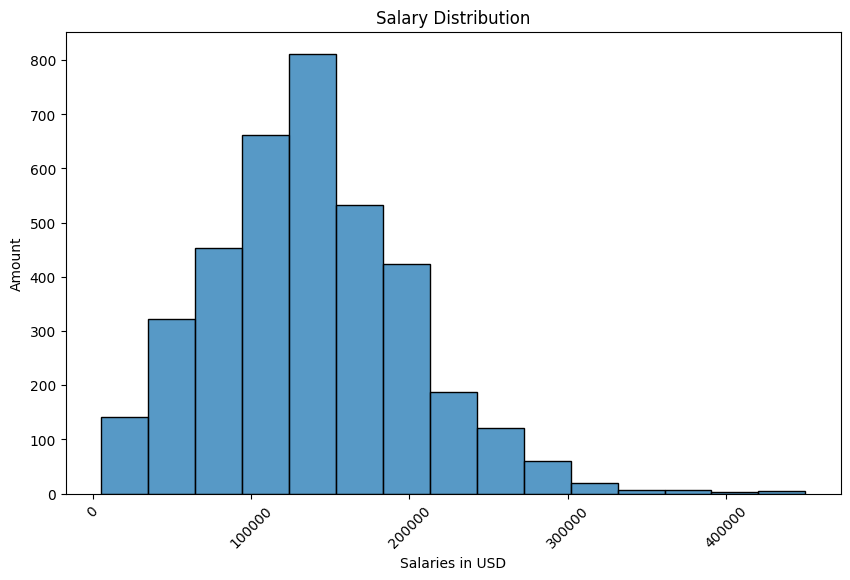

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(data["salary_in_usd"], bins=15)
plt.xticks(rotation=45)

plt.title('Salary Distribution')
plt.xlabel('Salaries in USD')
plt.ylabel('Amount')

plt.show()

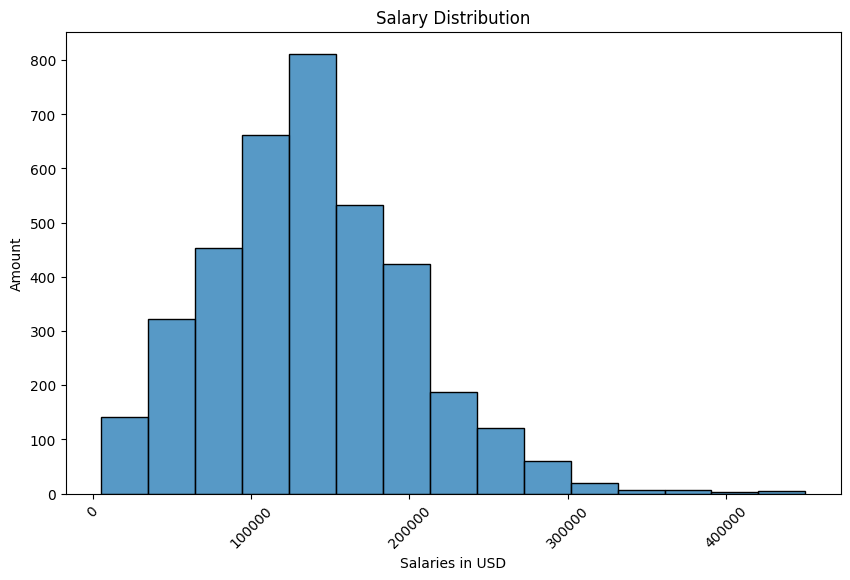

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(data["salary_in_usd"], bins=15)
plt.xticks(rotation=45)

plt.title('Salary Distribution')
plt.xlabel('Salaries in USD')
plt.ylabel('Amount')

plt.show()

***Job Titles***

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

job_titles = data["job_title"].unique()
job_titles

# keywords
keywords = ["Scientist",  "Machine", "Analyst", "AI", "BI", "Engineer", "Research", "Analytics", "Vision", "Architect", "Developer", "Manager", "Head", "Lead", "Cloud", "Specialist", "Principal"]

# create dictionary
clusters = {keyword: [] for keyword in keywords}
clusters["Others"] = []

# assign job titles
for title in job_titles:
    matched = False
    for keyword in keywords:
        if keyword.lower() in title.lower():
            clusters[keyword].append(title)
            matched = True
    if not matched:
        clusters["Others"].append(title)

# Ausgabe der Cluster
for keyword, titles in clusters.items():
    print(f"\nCluster für '{keyword}':")
    for title in titles:
        print(title)


Cluster für 'Scientist':
Principal Data Scientist
Data Scientist
Applied Scientist
Research Scientist
Applied Data Scientist
Machine Learning Scientist
AI Scientist
Applied Machine Learning Scientist
Lead Data Scientist
Data Scientist Lead
Product Data Scientist
Staff Data Scientist

Cluster für 'Machine':
Machine Learning Engineer
Applied Machine Learning Engineer
Machine Learning Researcher
Machine Learning Scientist
Applied Machine Learning Scientist
Machine Learning Infrastructure Engineer
Machine Learning Software Engineer
Machine Learning Research Engineer
Machine Learning Developer
Principal Machine Learning Engineer
Machine Learning Manager
Lead Machine Learning Engineer
Head of Machine Learning

Cluster für 'Analyst':
Data Analyst
Data Quality Analyst
Compliance Data Analyst
Business Data Analyst
Staff Data Analyst
Lead Data Analyst
Financial Data Analyst
BI Analyst
BI Data Analyst
Insight Analyst
Product Data Analyst
Data Operations Analyst
Marketing Data Analyst
Principal D

*** Charts: Countries, Job titles etc.  ***

In [8]:
employment_type_percentages = data["employment_type"].value_counts(normalize=True) * 100


plt.figure(figsize=(10,6))
plt.pie(employment_type_counts, labels=employment_type_counts.index, autopct='%1.1f%%')
plt.title("Employment Type")
plt.show()

employment_type_percentages

NameError: name 'employment_type_counts' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
experience_level_percentages = data["experience_level"].value_counts(normalize=True) * 100


plt.figure(figsize=(10,6))
plt.pie(experience_level_percentages, labels=experience_level_percentages.index, autopct='%1.1f%%')
plt.title("experience_level_percentages")
plt.legend()
plt.show()

experience_level_percentages

***Cleaning, Outliers etc...***

In [ ]:
# data.isnull().sum() --> no missing data!
data.boxplot() # Salary has outliers. 

In [ ]:
data.duplicated().sum() # Are these really duplicates? What to do? 

***Scaling the data***

In [ ]:
X = data.drop(columns=["salary", "salary_currency", "salary_in_usd"])
y = data ["salary_in_usd"]
X

We only scale X, there only the column remote_ratio contains numerical values (100,   0,  50). If scaling is necessary depends on the ML model. 

We don't scale y.... But in case we need to: salary contains outliers, therefore Robust Scaler is the best choice. 

Sjoerd: 
- work_year how to treat it?
- encode all columns and then scale them toghether, or create two pipelines? 


***Encoding the data***


Colums without order: 
- One hot encoder
- Job_title, employee_residence,company_location

Columns with order: 
- work_year, experience_level, employment_type, remote_ratio, company_size
- size mapping, e.g. for company size: 
size_mapping = {'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'XXL': 5}

--> After Encoding; Setup a preprocessing pipeline, to encode all features. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Columns to encode
encode_columns = ["experience_level", "employment_type", "job_title", "employee_residence"]

# Instantiate Encoder
ohe = OneHotEncoder()

# Fit and transform Encoder
encoded_columns = ohe.fit_transform(data[encode_columns]).toarray()

# create dataframe
encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(encode_columns))

# drop original columns from data
data_encoded = data.drop(columns=encode_columns)

# add encoded columns to data
data_encoded = pd.concat([data, encoded_df], axis=1)
data_encoded


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the distribution of the experience_level column
plt.figure(figsize=(10, 5))
experience_counts = data['experience_level'].value_counts()
experience_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Plotting the distribution of the employment_type column
plt.figure(figsize=(10, 5))
employment_counts = data['employment_type'].value_counts()
employment_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Filter the dataset for Entry-level / Junior (EN)
entry_level_data = data[data['experience_level'] == 'EN']

# Define custom salary ranges (bins) and labels
bins = [0, 30000, 50000, 80000, 110000, float('inf')]
labels = ['0-30k', '30-50k', '50-80k', '80-110k', '110k+']

# Bin the salary data into the defined ranges
entry_level_data['salary_range'] = pd.cut(entry_level_data['salary'], bins=bins, labels=labels, right=False)

# Count the occurrences of each salary range
salary_range_counts = entry_level_data['salary_range'].value_counts().sort_index()

# Plotting the number of occurrences of each salary range for Entry-level / Junior using a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=salary_range_counts.index, y=salary_range_counts.values, palette='pastel')
plt.title('Salary Distribution for Entry-level / Junior')
plt.xlabel('Salary Range')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define the function to categorize remote ratios
def categorize_remote_ratio(ratio):
    if ratio == 0:
        return 'In-Office'
    elif ratio == 100:
        return 'Remote'
    else:
        return 'Hybrid'

# Apply the function to create a new 'remote_category' column
data['remote_category'] = data['remote_ratio'].apply(categorize_remote_ratio)

# Count the occurrences of each salary for each experience level and remote category
salary_counts = data.groupby(['salary', 'experience_level', 'remote_category']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(14, 7))
sns.scatterplot(
    x='salary', 
    y='count', 
    hue='experience_level', 
    style='remote_category', 
    data=salary_counts, 
    palette='deep', 
    markers=['o', 's', 'D'],  # Circle, square, diamond markers
    s=100  # Marker size
)

plt.title('Impact of Remote Positions on Salary for Different Experience Levels')
plt.xlabel('Salary')
plt.ylabel('Number of Occurrences')
plt.legend(title='Experience Level / Remote Category')
plt.grid(True)
plt.show()

In [10]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
BS       1
IR       1
CR       1
AL       1
BA       1
Name: count, Length: 72, dtype: int64


/tmp/ipykernel_150937/2799511904.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


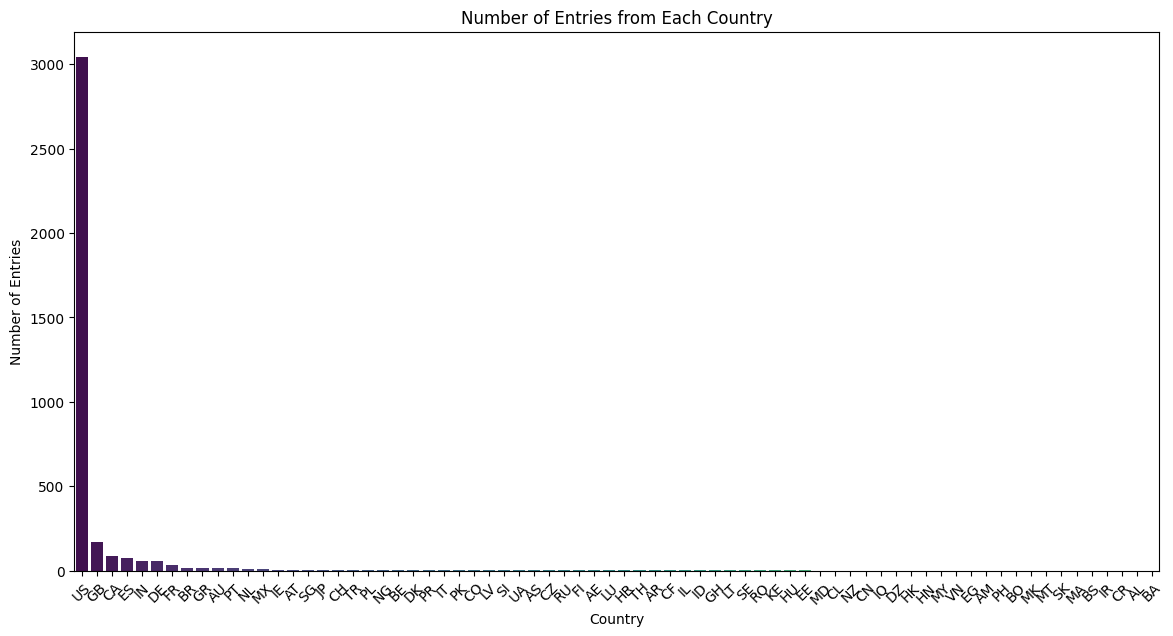

In [15]:
# Count the number of entries for each country
country_counts = data['company_location'].value_counts()

# Display the counts (optional)
print(country_counts)

# Set the figure size
plt.figure(figsize=(14, 7))

# Create a bar plot of the number of entries for each country
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')

# Set plot title and labels
plt.title('Number of Entries from Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)  # Rotate the x labels for better readability

# Display the plot
plt.show()

In [16]:
country_counts.head(15)

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
GR      14
AU      14
PT      14
NL      13
MX      10
IE       7
AT       6
Name: count, dtype: int64

In [17]:
# Create a boolean mask where employee_residence is different from company_location
mismatch_mask = data['employee_residence'] != data['company_location']

# Count the number of mismatches
mismatch_count = mismatch_mask.sum()

# Display the count of mismatches
print(f'Number of entries with different employee residence and company location: {mismatch_count}')

Number of entries with different employee residence and company location: 96


/tmp/ipykernel_150937/2736480727.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mismatch Type', y='Count', data=mismatch_data, palette='viridis')


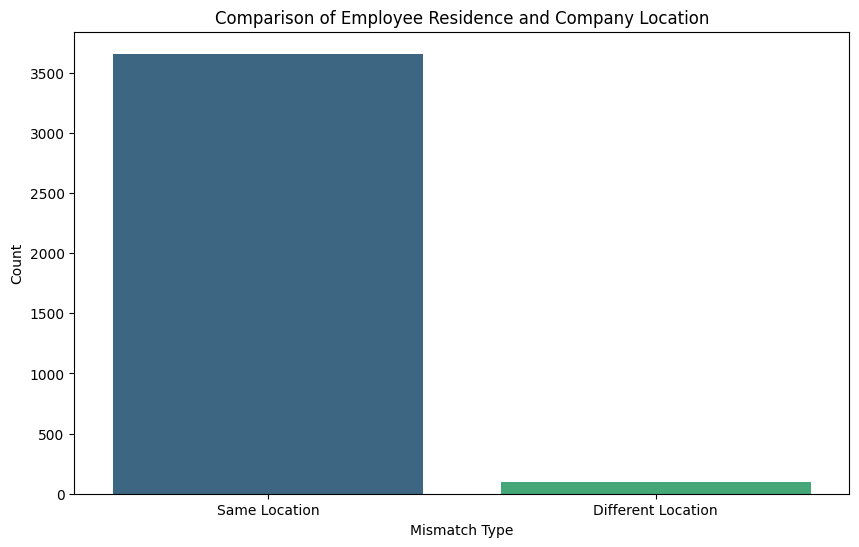

In [18]:
# Create a DataFrame with mismatch counts
mismatch_data = pd.DataFrame({
    'Mismatch Type': ['Same Location', 'Different Location'],
    'Count': [len(data) - mismatch_count, mismatch_count]
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Mismatch Type', y='Count', data=mismatch_data, palette='viridis')
plt.title('Comparison of Employee Residence and Company Location')
plt.xlabel('Mismatch Type')
plt.ylabel('Count')
plt.show()

In [19]:
# Define categories based on the criteria
def categorize_jobs(row):
    if row['remote_ratio'] == 0:
        return '0% Remote'
    elif row['remote_ratio'] > 0 and row['employee_residence'] == row['company_location']:
        return 'Hybrid/Remote - Same Country'
    else:
        return 'Hybrid/Remote - Different Country'

# Apply the function to create a new 'job_category' column
data['job_category'] = data.apply(categorize_jobs, axis=1)

# Count the number of entries for each category
category_counts = data['job_category'].value_counts()

# Display the counts (optional)
print(category_counts)

job_category
0% Remote                            1923
Hybrid/Remote - Same Country         1743
Hybrid/Remote - Different Country      89
Name: count, dtype: int64


/tmp/ipykernel_150937/226202652.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


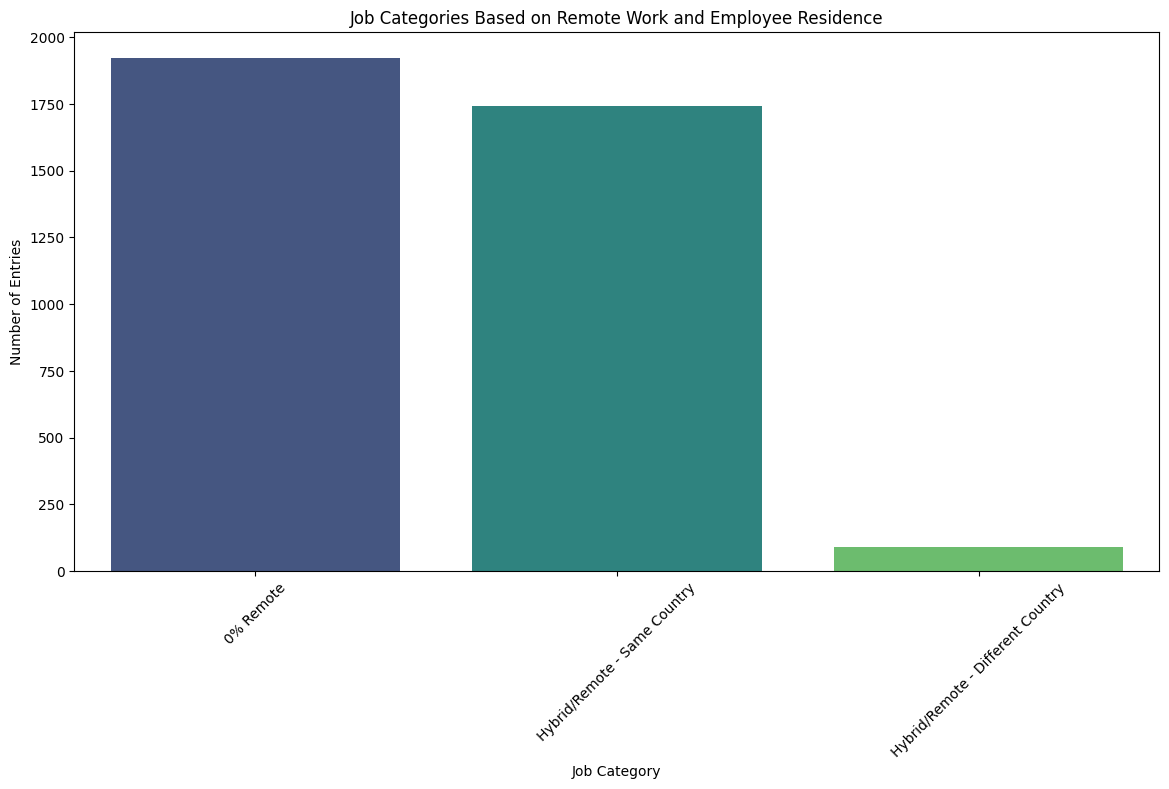

In [20]:
# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Job Categories Based on Remote Work and Employee Residence')
plt.xlabel('Job Category')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()